# Acessing the data

In [435]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import jaccard_score

In [195]:
recipes_enc = pd.read_csv("./food-com-recipes-and-user-interactions/PP_recipes.csv", index_col="id")
users_enc = pd.read_csv("./food-com-recipes-and-user-interactions/PP_users.csv")
interactions_train = pd.read_csv("./food-com-recipes-and-user-interactions/interactions_train.csv")
interactions_test = pd.read_csv(("./food-com-recipes-and-user-interactions/interactions_test.csv"))

In [196]:
# Recipes
# Preprocessed data contains prepped data for using BERT
# Difficult to get the technique encoding as from Germany there is only viewing access?!
recipes_enc.head()

,i,name_tokens,ingredient_tokens,steps_tokens,techniques,calorie_level,ingredient_ids
id,,,,,,,
424415,23,"[40480, 37229, 2911, 1019, 249, 6878, 6878, 28...","[[2911, 1019, 249, 6878], [1353], [6953], [153...","[40480, 40482, 21662, 481, 6878, 500, 246, 161...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[389, 7655, 6270, 1527, 3406]"
146223,96900,"[40480, 18376, 7056, 246, 1531, 2032, 40481]","[[17918], [25916], [2507, 6444], [8467, 1179],...","[40480, 40482, 729, 2525, 10906, 485, 43, 8393...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[2683, 4969, 800, 5298, 840, 2499, 6632, 7022,..."
312329,120056,"[40480, 21044, 16954, 8294, 556, 10837, 40481]","[[5867, 24176], [1353], [6953], [1301, 11332],...","[40480, 40482, 8240, 481, 24176, 296, 1353, 66...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",1,"[1257, 7655, 6270, 590, 5024, 1119, 4883, 6696..."
74301,168258,"[40480, 10025, 31156, 40481]","[[1270, 1645, 28447], [21601], [27952, 29471, ...","[40480, 40482, 5539, 21601, 1073, 903, 2324, 4...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[7940, 3609, 7060, 6265, 1170, 6654, 5003, 3561]"
76272,109030,"[40480, 17841, 252, 782, 2373, 1641, 2373, 252...","[[1430, 11434], [1430, 17027], [1615, 23, 695,...","[40480, 40482, 14046, 1430, 11434, 488, 17027,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[3484, 6324, 7594, 243]"


In [197]:
recipes_enc.techniques.values

array(['[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]',
       '[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]',
       '[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]',
       ...,
       '[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]',
       '[0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]',
       '[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [198]:
# Users
users_enc.head()

,u,techniques,items,n_items,ratings,n_ratings
0,0,"[8, 0, 0, 5, 6, 0, 0, 1, 0, 9, 1, 0, 0, 0, 1, ...","[1118, 27680, 32541, 137353, 16428, 28815, 658...",31,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 4.0, ...",31
1,1,"[11, 0, 0, 2, 12, 0, 0, 0, 0, 14, 5, 0, 0, 0, ...","[122140, 77036, 156817, 76957, 68818, 155600, ...",39,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...",39
2,2,"[13, 0, 0, 7, 5, 0, 1, 2, 1, 11, 0, 1, 0, 0, 1...","[168054, 87218, 35731, 1, 20475, 9039, 124834,...",27,"[3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, ...",27
3,3,"[498, 13, 4, 218, 376, 3, 2, 33, 16, 591, 10, ...","[163193, 156352, 102888, 19914, 169438, 55772,...",1513,"[5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 5.0, 5.0, ...",1513
4,4,"[161, 1, 1, 86, 93, 0, 0, 11, 2, 141, 0, 16, 0...","[72857, 38652, 160427, 55772, 119999, 141777, ...",376,"[5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 4.0, 5.0, ...",376


In [199]:
# Testing 
users_enc["items"].iloc[10000]

'[155665, 124230, 50265]'

In [200]:
# Assume that items are recipies and testing it
# Looking at the data frame this must be the case, but the data is sparse
recipes_enc.loc[eval(users_enc["items"].iloc[10000]),:]

C:\Users\Bene\Anaconda3\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,i,name_tokens,ingredient_tokens,steps_tokens,techniques,calorie_level,ingredient_ids
id,,,,,,,
155665,2236.0,"[40480, 12187, 6821, 11551, 40481]","[[5339], [8780], [23488], [1615, 23, 695, 2338...","[40480, 40482, 8780, 1109, 2000, 498, 5339, 40...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0,"[715, 840, 4880, 7594, 2499, 4717, 6270, 5319]"
124230,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50265,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [530]:
# Is there only a recipes raw or a users raw as well?
recipes = pd.read_csv("./food-com-recipes-and-user-interactions/RAW_recipes.csv", parse_dates=['submitted'], infer_datetime_format=True)
interactions = pd.read_csv("./food-com-recipes-and-user-interactions/RAW_interactions.csv", parse_dates=['date'], infer_datetime_format=True)

In [534]:
recipes.id.size - recipes.id.unique().size

0

In [242]:
# Explore the raw recipe file
recipes.head()

# Identify the meaning of nutrition column
# Total calories
# % Daily Value of Total Fat
# % Daily Value of Sugars
# % Daily Value of Sodium
# % Daily Value of Protein
# % Daily Value of Saturated Fat
# % Daily Value of Total Carbohydrate

,name,minutes,contributor_id,submitted,tags,n_steps,steps,description,ingredients,n_ingredients,year_submitted,month_submitted,day_submitted,total_cal,daily_perc_fat,daily_perc_sugars,daily_perc_sodium,daily_perc_protein,daily_perc_sat_fat,daily_perc_carbs
id,,,,,,,,,,,,,,,,,,,,
137739,arriba baked winter squash mexican style,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,2005,9,16,51.5,0.0,13.0,0.0,2.0,0.0,4.0
31490,a bit different breakfast pizza,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,2002,6,17,173.4,18.0,0.0,17.0,22.0,35.0,1.0
112140,all in the kitchen chili,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,2005,2,25,269.8,22.0,32.0,48.0,39.0,27.0,5.0
59389,alouette potatoes,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,2003,4,14,368.1,17.0,10.0,2.0,14.0,8.0,20.0
44061,amish tomato ketchup for canning,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,2002,10,25,352.9,1.0,337.0,23.0,3.0,0.0,28.0


In [203]:
# Testing the user items on the unprocessed file as well

# Different result as above
recipes.loc[eval(users_enc["items"].iloc[10000]),:]

,name,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
id,,,,,,,,,,,
155665,baked cheese sandwiches,375.0,36124.0,2006-02-11,"['time-to-make', 'course', 'main-ingredient', ...","[322.3, 21.0, 18.0, 41.0, 30.0, 37.0, 10.0]",10.0,"['butter both sides of bread', 'lay 8 slices i...",great with a bowl of your favorite soup. or wi...,"['bread', 'butter', 'mustard', 'velveeta chees...",8.0
124230,easy italian chicken marinade,390.0,64203.0,2005-05-31,"['time-to-make', 'course', 'main-ingredient', ...","[1167.5, 128.0, 139.0, 95.0, 128.0, 98.0, 13.0]",1.0,['marinate chicken for 6 hours or overnight an...,this is so easy and good. a favorite way of ou...,"['boneless chicken', 'italian salad dressing',...",6.0
50265,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [204]:
# Explore the raw interaction file
interactions.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


# Data Exploration

## Recipes

### Descriptive statistics

In [205]:
# Checking the numeric columns
recipes.describe(include = np.number)

# Large outlier(s) in mintues

,minutes,contributor_id,n_steps,n_ingredients
count,2.316370e+05,2.316370e+05,231637.000000,231637.000000
mean,9.398546e+03,5.534885e+06,9.765499,9.051153
std,4.461963e+06,9.979141e+07,5.995128,3.734796
min,0.000000e+00,2.700000e+01,0.000000,1.000000
25%,2.000000e+01,5.690500e+04,6.000000,6.000000
50%,4.000000e+01,1.736140e+05,9.000000,9.000000
75%,6.500000e+01,3.982750e+05,12.000000,11.000000
max,2.147484e+09,2.002290e+09,145.000000,43.000000


In [206]:
# Checking the object columns
recipes.describe(include = np.object)

,name,tags,nutrition,steps,description,ingredients
count,231636,231637,231637,231637,226658,231637
unique,230185,209115,229318,231074,222668,230475
top,brown sugar glazed carrots,"['15-minutes-or-less', 'time-to-make', 'course...","[69.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",['blend all ingredients until smooth'],yum,"['eggs', 'water']"
freq,3,397,36,20,153,10


### minutes

(array([2.31636e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([0.00000000e+00, 2.14748365e+08, 4.29496729e+08, 6.44245094e+08,
        8.58993459e+08, 1.07374182e+09, 1.28849019e+09, 1.50323855e+09,
        1.71798692e+09, 1.93273528e+09, 2.14748365e+09]),
 <a list of 10 Patch objects>)

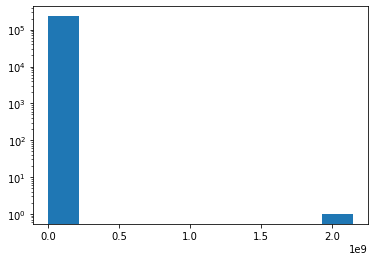

In [207]:
#Plot distirbution of minutes on log scale to see that there is one outlier
plt.hist(recipes.minutes, log=True)

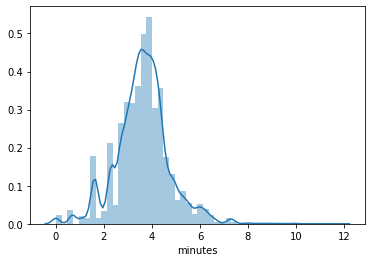

In [208]:
# Doing the histogram of minutes to get a better understanding

# plt.hist(np.log(recipes.minutes.sample(10000, random_state=42), where= recipes.minutes.sample(10000, random_state=42) > 0), density=True)
sns.distplot(np.log(recipes.minutes.sample(10000, random_state=42), where= recipes.minutes.sample(10000, random_state=42) > 0))

### n_steps

(array([6.89722222e-02, 5.11388889e-02, 1.36805556e-02, 3.70833333e-03,
        9.44444444e-04, 3.33333333e-04, 5.55555556e-05, 1.38888889e-05,
        2.77777778e-05, 1.38888889e-05]),
 array([ 1. ,  8.2, 15.4, 22.6, 29.8, 37. , 44.2, 51.4, 58.6, 65.8, 73. ]),
 <a list of 10 Patch objects>)

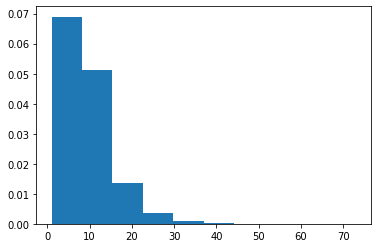

In [209]:
#Plot distribution of n_steps based on a sample
plt.hist(recipes.n_steps.sample(10000, random_state=42), density=True)

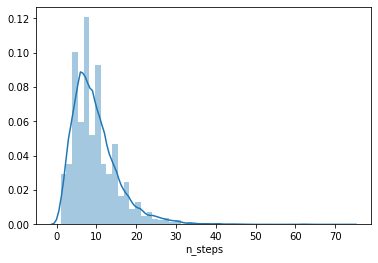

In [210]:
sns.distplot(recipes.n_steps.sample(10000, random_state=42))

### n_ingredients

(array([0.03375   , 0.09985714, 0.11178571, 0.07039286, 0.02239286,
        0.01353571, 0.00403571, 0.00103571, 0.00021429, 0.00014286]),
 array([ 2. ,  4.8,  7.6, 10.4, 13.2, 16. , 18.8, 21.6, 24.4, 27.2, 30. ]),
 <a list of 10 Patch objects>)

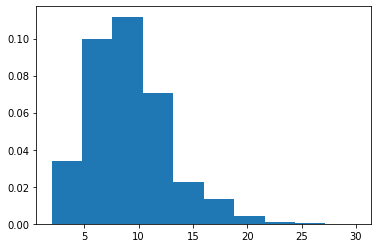

In [211]:
#Plot distribution of n_ingredients based on a sample
plt.hist(recipes.n_ingredients.sample(10000, random_state=42), density=True)

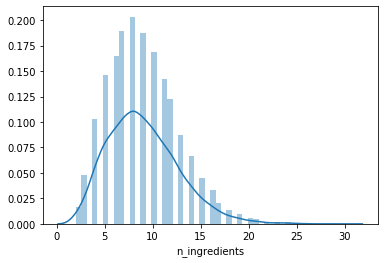

In [212]:
sns.distplot(recipes.n_ingredients.sample(10000, random_state=42))

### submitted

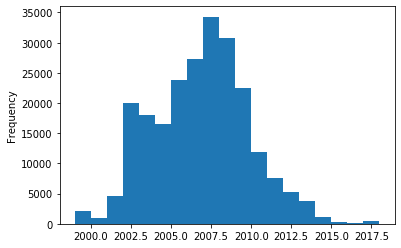

In [213]:
#Checking the distribution of years
recipes["year_submitted"] = recipes.submitted.apply(lambda ts: ts.year)
recipes.year_submitted.plot.hist(bins=recipes.year_submitted.max()-recipes.year_submitted.min())

1     21856
5     21684
3     20571
4     20186
10    19131
8     18866
11    18771
6     18726
9     18631
7     18584
2     18536
12    16095
Name: month_submitted, dtype: int64

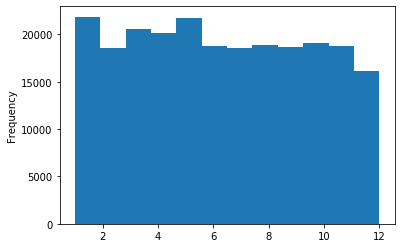

In [214]:
#Checking the distribution of month
recipes["month_submitted"] = recipes.submitted.apply(lambda ts: ts.month)
recipes.month_submitted.plot.hist(bins=12)

recipes.month_submitted.value_counts()

# Checking the distribution of days

8     9062
3     8765
6     8536
13    8248
20    8175
12    7985
9     7841
5     7793
7     7684
29    7670
28    7617
15    7596
2     7518
27    7446
16    7411
17    7366
18    7328
10    7304
30    7302
4     7301
24    7288
11    7272
23    7272
14    7236
19    7231
21    7218
25    7201
22    7179
1     6890
26    6536
31    4366
Name: day_submitted, dtype: int64

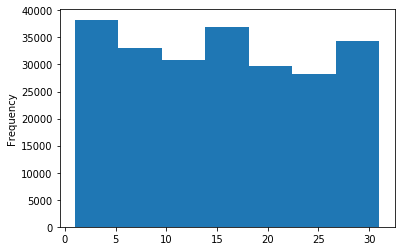

In [338]:
recipes["day_submitted"] = recipes.submitted.apply(lambda ts: ts.day)
recipes.day_submitted.plot.hist(bins=7)

recipes.day_submitted.value_counts()
### No specific times of the month are relevant

### name

In [216]:
#Some actual duplicates in the names of recipes these are null values on the recipes
print(f"Duplicate recipes cause of missing values:  {recipes.name.size - recipes.name.unique().size}")

Duplicate recipes:  1451


In [508]:
# Finding common words in recipes
names_list = []
for value in recipes.name[~(recipes.name.isna())]:
    names_list.extend(value.split())

recipe_names = pd.Series(names_list)
print(f'Top 20 words in recipes:\n{recipe_names.value_counts()[:20]}\n')

vectorizer = CountVectorizer(binary=True)

# Sample the recipe names
names_sample = recipes.name[~(recipes.name.isna())].sample(100, random_state=42)
vectorizer.fit(names_sample)
names_vsm = vectorizer.transform(names_sample)

score = np.zeros((np.shape(names_vsm)[0],np.shape(names_vsm)[0]))

for i in range(0,np.shape(names_vsm)[0]):
    for j in range(0,np.shape(names_vsm)[0]):
        score[i][j] = jaccard_score(names_vsm[i],names_vsm[j], average='weighted')

Top 20 words in recipes:
and          30217
with         26640
chicken      22966
s            19285
salad        13299
sauce        10075
cheese        9745
chocolate     9029
soup          8859
cake          8344
bread         7074
cream         6534
easy          6445
pie           6057
cookies       6012
rice          5736
potato        5514
pork          5430
beef          5386
casserole     5378
dtype: int64



In [529]:
score = pd.DataFrame(score, columns=names_sample.values, index=names_sample.values)
((score[score > 0.1].count().values.sum() - 100)/2) / 10000

0.027

### ingredients

In [370]:
# Get the number of unique ingredients

#Transform column ingredients
ingredient_list = []
for e in recipes.ingredients.values:
    ingredient_list.extend(eval(e[1:-1]))
    
ingredients = pd.Series(ingredient_list, name="ingredients")

print(f'Count of salt and pepper: {ingredient_list.count("salt and pepper")}')
print(f'Count of salt: {ingredient_list.count("salt")}')
print(f'Count of pepper: {ingredient_list.count("pepper")}\n')

print(f'Top 10 ingredients:\n{ingredients.value_counts()[0:10]}\n')
print(f'Worste 10 ingredients:\n{ingredients.value_counts()[-11:]}\n')
      
ingredients_unique = pd.Series(ingredients.unique()[ingredients.value_counts() > 10])
print(f'Number of "unique" ingredients that appear in more than 10 recipes: {ingredients_unique.size}')
### There are very frequent ingredients and very special infrequent ingredients
### There are overlaps between the ingredients

Count of salt and pepper: 15415
Count of salt: 85746
Count of pepper: 22319

Top 10 ingredients:
salt             85746
butter           54975
sugar            44534
onion            39065
water            34914
eggs             33761
olive oil        32822
flour            26266
milk             25786
garlic cloves    25748
Name: ingredients, dtype: int64

Worste 10 ingredients:
non-hydrogenated peanut butter         1
spicy clamato juice                    1
bone-in beef rib roast                 1
cushaw                                 1
low-calorie oatmeal bread              1
rau ram                                1
kalamata olives in red wine vinegar    1
macadamia nut syrup                    1
sesame garlic sauce                    1
canned french snails                   1
low-sugar low-sodium ketchup           1
Name: ingredients, dtype: int64

Number of "unique" ingredients that appear in more than 10 recipes: 5751


### nutrition


In [217]:
# Split nutrition column into single features

# Total calories
# % Daily Value of Total Fat
# % Daily Value of Sugars
# % Daily Value of Sodium
# % Daily Value of Protein
# % Daily Value of Saturated Fat
# % Daily Value of Total Carbohydrate
nutrition_cols = ["total_cal","daily_perc_fat", "daily_perc_sugars", "daily_perc_sodium", "daily_perc_protein", "daily_perc_sat_fat", "daily_perc_carbs"]
nutrition = pd.DataFrame(0,columns=nutrition_cols, index=recipes.index)
nutrition[nutrition_cols] = [eval(nutrition) for nutrition in recipes.nutrition.values]
try:
    recipes = recipes.join(nutrition)
except:
    pass

try:
    recipes.pop("nutrition")
except:
    pass

recipes.head()

,name,minutes,contributor_id,submitted,tags,n_steps,steps,description,ingredients,n_ingredients,year_submitted,month_submitted,day_submitted,total_cal,daily_perc_fat,daily_perc_sugars,daily_perc_sodium,daily_perc_protein,daily_perc_sat_fat,daily_perc_carbs
id,,,,,,,,,,,,,,,,,,,,
137739,arriba baked winter squash mexican style,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,2005,9,16,51.5,0.0,13.0,0.0,2.0,0.0,4.0
31490,a bit different breakfast pizza,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,2002,6,17,173.4,18.0,0.0,17.0,22.0,35.0,1.0
112140,all in the kitchen chili,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,2005,2,25,269.8,22.0,32.0,48.0,39.0,27.0,5.0
59389,alouette potatoes,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,2003,4,14,368.1,17.0,10.0,2.0,14.0,8.0,20.0
44061,amish tomato ketchup for canning,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,2002,10,25,352.9,1.0,337.0,23.0,3.0,0.0,28.0


In [221]:
# Descriptive statistics of nutrition
recipes[nutrition_cols].describe()

### perc_nutrition values are dangerous as it is calculated per serving. Serving sizes might be unreasonable.

,total_cal,daily_perc_fat,daily_perc_sugars,daily_perc_sodium,daily_perc_protein,daily_perc_sat_fat,daily_perc_carbs
count,231637.000000,231637.00000,231637.000000,231637.000000,231637.00000,231637.000000,231637.000000
mean,473.942425,36.08070,84.296865,30.147485,34.68186,45.589150,15.560403
std,1189.711374,77.79884,800.080897,131.961589,58.47248,98.235758,81.824560
min,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,174.400000,8.00000,9.000000,5.000000,7.00000,7.000000,4.000000
50%,313.400000,20.00000,25.000000,14.000000,18.00000,23.000000,9.000000
75%,519.700000,41.00000,68.000000,33.000000,51.00000,52.000000,16.000000
max,434360.200000,17183.00000,362729.000000,29338.000000,6552.00000,10395.000000,36098.000000


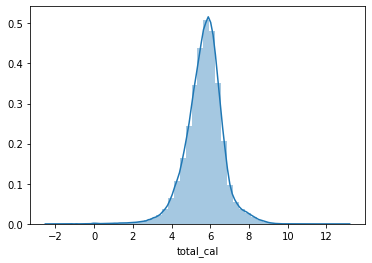

In [231]:
#The distribution has very large values, thus it is transformed to log-scale
sns.distplot(np.log(recipes.total_cal, where=recipes.total_cal > 0))

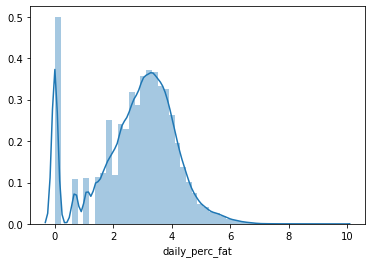

In [235]:
#Daily percentage of fat (there are recipes with no fat)
sns.distplot(np.log(recipes.daily_perc_fat, where=recipes.daily_perc_fat > 0))

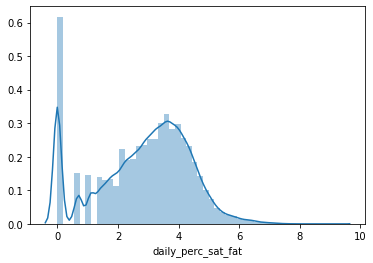

In [238]:
#Daily percentage of saturated fat
sns.distplot(np.log(recipes.daily_perc_sat_fat, where=recipes.daily_perc_sat_fat> 0))

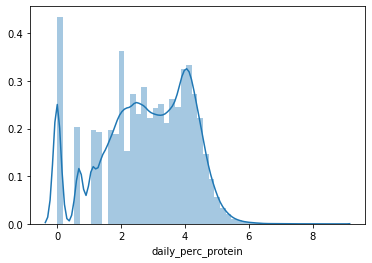

In [236]:
#Daily percentage of protein
sns.distplot(np.log(recipes.daily_perc_protein, where=recipes.daily_perc_protein > 0))

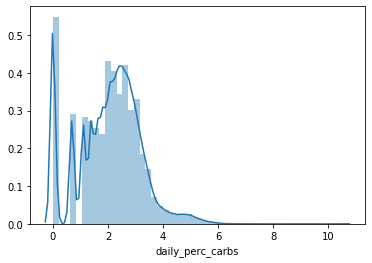

In [237]:
#Daily percentage of carbs
sns.distplot(np.log(recipes.daily_perc_carbs, where=recipes.daily_perc_carbs> 0))

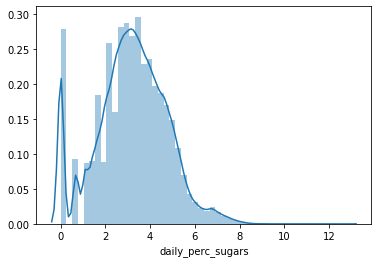

In [240]:
#Daily percentage of sugars
sns.distplot(np.log(recipes.daily_perc_sugars, where=recipes.daily_perc_sugars> 0))

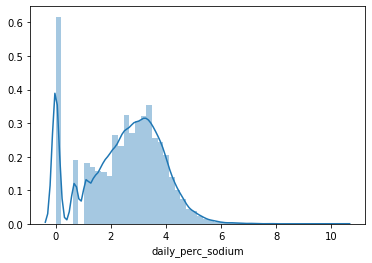

In [241]:
#Daily percentage of sodium
sns.distplot(np.log(recipes.daily_perc_sodium, where=recipes.daily_perc_sodium> 0))

### Missing values

In [222]:
#Missing values per column
for c in recipes.columns:
    print("Missing values in "+c)
    print(recipes[c].loc[recipes[c].isnull()].size)

Missing values in name
1
Missing values in minutes
0
Missing values in contributor_id
0
Missing values in submitted
0
Missing values in tags
0
Missing values in nutrition
0
Missing values in n_steps
0
Missing values in steps
0
Missing values in description
4979
Missing values in ingredients
0
Missing values in n_ingredients
0


# Users

In [ ]:
# Out of scope for the moment ==> need to decode PP_users

# Interaction

In [223]:
# Numerical variables
interactions.describe()

,user_id,recipe_id,rating
count,1.132367e+06,1.132367e+06,1.132367e+06
mean,1.384291e+08,1.608972e+05,4.411016e+00
std,5.014269e+08,1.303987e+05,1.264752e+00
min,1.533000e+03,3.800000e+01,0.000000e+00
25%,1.354700e+05,5.425700e+04,4.000000e+00
50%,3.309370e+05,1.205470e+05,5.000000e+00
75%,8.045500e+05,2.438520e+05,5.000000e+00
max,2.002373e+09,5.377160e+05,5.000000e+00


In [224]:
interactions.describe(include=np.object)

,date,review
count,1132367,1132198
unique,6396,1125282
top,2008-01-27,Delicious!
freq,723,309


(array([ 564.,    0.,  120.,    0.,  132.,    0.,  318.,    0., 1656.,
        7210.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

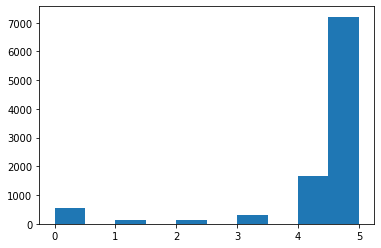

In [231]:
# Plot the distribution of ratings
plt.hist(interactions.rating.sample(10000, random_state=42))

In [232]:
#Missing values per column
for c in interactions.columns:
    print("Missing values in "+c)
    print(interactions[c].loc[interactions[c].isnull()].size)

Missing values in user_id
0
Missing values in recipe_id
0
Missing values in date
0
Missing values in rating
0
Missing values in review
169
